# The interplay between noise and chaos

***by Kevin Fei***
*** working under Professor Rajarshi Roy, Professor Tom Murphy, and Joe Hart

Random numbers are instrumental to modern computing. They are used by scientists for running simulations and cryptographers for security. Previously, we relied on "pseudo-random" number generators, meaning that the random numbers produced were all produced based on one number, the seed. Though to most observers the numbers produced would be unpredictable, if you were to obtain the seed you would know all the numbers produced by the generator. If this system had been encrypting data for a company, then all security would be compromised.

To avoid these pitfalls, we are turning to truly random physical processes to generate our numbers. These processes are truly unpredictable. These systems rely on two sources of randomness: noise and chaos. Though both produce similar results, they are fundamentally different in nature.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## What is noise?

**Noise** refers to the random variation of values. Often unwanted, these cause a measurement to fluctuate over time. For example, if we're measuring the intensity of a laser, our measurement may vary over time from 900 to 881 to 913 mW. This is noise. There are many types of noise. Some of it is due to variations in the environment, like static on TV or background noise in a recording, while others are due to imperfections in the equipment like a defect in the laser.

<img src="data/whitenoise.gif" width="200" height="200">

There is also a quantum brand of noise called **shot noise**. This happens due to the discrete nature of certain fundamental particles like electrons or photons. These particles are **quantized** because there is no such thing as half a photon or electron. Light can be viewed as both a wave or a stream of photons. When you fire a laser at a certain frequency, each photon has a certain amount of energy. When you fire the laser at a certain intensity, your measured value of the intensity will be inexact. Because the energy is transferred through a whole number of photons per second, the intensity at a given time may not be as you expect. For example if a photon corresponds to 5 units of energy and you have an intensity of 8 units per second, every second you might measure one or two photons. Overall this would average and give you 8 units per second. 

One common method of reducing noise to take more data. As we take more and more measurements, the final value we get will be more accurate. This makes sense as flipping a coin twice cannot determine its fairness, while flipping it a hundred times will give you a better idea.

## What is chaos?

**Chaos** happens when the properties of a system cause small differences in initial conditions to lead to drastically different situations. One example of a chaotic system is the weather. In the 1950s, mathematician Edward Lorenz attempted to model local weather based off computer simulations. He found that a tiny change in the current temperature or humidity, even dropping a decimal point off a number, could change the forecast from a sunny day to a thunderstorm. This led him to formulate the butterfly effect, noting that if a butterfly flaps their wings in Wales, it could cause a tornado in Texas. Other examples include turbulence in fluids and the double pendulum.

The following graph depicts the Lorenz system, a model of a point moving through space. The graph shows the path of the particle through space. The equations that control the motion are chaotic and you can see many of the characteristic features in the 3d diagram. One such feature is the fractal structure occurring at the intersection of the two loops. **Fractals** are patterns that look the same as you continue to zoom in on them. If you were to let the particle keep on running forever and keep zooming at the intersection, you would observe the same pattern of lines barely missing.

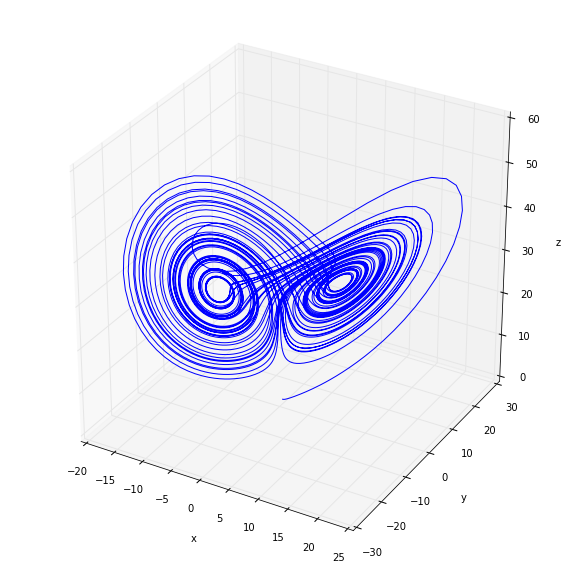

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

runsim = True

points = [[],[],[]]
pointsp = [[],[],[]]

x, y, z = 0, 1, 0
xp, yp, zp = 0, 1.000001, 0
dt = 0.01

def getlorenzevol(x, y, z):
    dx = (10 * (y - x)) * dt
    dy = (28 * x - y - x * z) * dt
    dz = (x * y - 8/3 * z) * dt
    
    x += dx
    y += dy
    z += dz 
    
    return x, y, z

t = 0
while runsim and len(points[0]) < 7000:
    x,y,z = getlorenzevol(x,y,z)
    xp, yp, zp = getlorenzevol(xp,yp,zp)
    
    points[0].append(x)
    points[1].append(y)
    points[2].append(z)
    pointsp[0].append(xp)
    pointsp[1].append(yp)
    pointsp[2].append(zp)
    t += dt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("z")
plt.plot(points[0],points[1],points[2])
plt.show(fig)

As shown in the following diagram, it is apparent how quickly three points that start almost on top of each other very quickly move apart. Though the difference in initial conditions is small, their positions change in remarkably different ways. At 2 seconds, they are still close together but fly apart by 3 seconds. As further time passes, the particles' movement does not show any evidence of their past similarity and it is impossible to predict where they will be.

In [3]:
from IPython.display import HTML
JS_FUNCTION = """
<script type="text/javascript">
  function interactUpdate(div){
     var outputs = div.getElementsByTagName("div");
     var controls = div.getElementsByTagName("input");

     var value = "";
     for(i=0; i<controls.length; i++){
       if((controls[i].type == "range") || controls[i].checked){
         value = value + controls[i].getAttribute("name") + controls[i].value;
       }
     }

     for(i=0; i<outputs.length; i++){
       var name = outputs[i].getAttribute("name");
       if(name == value){
          outputs[i].style.display = 'block';
       } else if(name != "controls"){
          outputs[i].style.display = 'none';
       }
     }
  }
</script>
"""
WIDGETS = """
<div>
 Change the time:
 <input type="range" name="num" min="0" max="8", step="1" style="width:400px", oninput="interactUpdate(this.parentNode);" value="0">
<div name="num0", style="display:block">
   <img src="lorenz/lorenz0.png">
 </div>
<div name="num1", style="display:none">
   <img src="lorenz/lorenz1.png">
 </div>
 <div name="num2", style="display:none">
   <img src="lorenz/lorenz2.png">
 </div>
  <div name="num3", style="display:none">
   <img src="lorenz/lorenz3.png">
 </div>
  <div name="num4", style="display:none">
   <img src="lorenz/lorenz4.png">
 </div>
  <div name="num5", style="display:none">
   <img src="lorenz/lorenz5.png">
 </div>
  <div name="num6", style="display:none">
   <img src="lorenz/lorenz6.png">
 </div>
  <div name="num7", style="display:none">
   <img src="lorenz/lorenz7.png">
 </div>
  <div name="num8", style="display:none">
   <img src="lorenz/lorenz8.png">
 </div>
</div>
"""
HTML(JS_FUNCTION + WIDGETS)

## The difference between noise and chaos

The fundamental difference between noise and chaos is that noise is **stochastic** while chaos is **deterministic**.

**Stochastic** means the system depend on a probability. For example, suppose you were standing on a number line and flipped a coin every second. If it was heads you moved right and if it was tails you moved left. You can't predict the future because there's only a chance that you go one way or another. This property usually arises from quantum mechanics, where things are not for certain, but very likely.

**Deterministic** means that the system will change the same way from the same starting conditions every time. In this way one could predict the chaotic behavior if one were to know all the decimal points on a measurement. However, we cannot have perfect information (also restricted by quantum mechanics), so the tiny immeasurable differences will be amplified until the system is effectively unpredictable.

## Our Experiment - The Chaotic Laser

We will investigate noise and chaos in a system that contains both of these, the chaotic laser.

<img src="data/circuit.png">

Let's go through the different components of the system.
* Laser - This is the driving force of the system. It shoots out a beam of light at an intensity we can change with an attenuator. This means we can change the number of photons coming out of the laser.
* Modulator - The light from the laser shines through the modulator which "modulates" or changes the intensity of light passing through it. The amount the modulator changes the light depends nonlinearly on the voltage applied to it.
* Photon Counter - This instrument records sends a pulse to the FPGA every time a photon arrives.
* FPGA - A circuit board that contains two main important components.
  * Time Delay - Waits a certain amount of time to pass the pulse to the filter
  * Filter - Applies a certain voltage to the modulator based off the arrival of photons.

In this circuit, we analyze how the voltage change with time. We observe shot noise in this system with the photon counter. As illustrated above, the number of photons captured in a certain time interval can change randomly.
Our experiment features several notable features: the *self-feedback* in the overall loop, the *nonlinearity* in the modulator, and the *time delay* in the FPGA. With our experiment configured correctly, these ingredients create chaos.

## How do they affect each other?

For a long time, scientists could not control the amount of noise in a system. It is difficult to adjust the amount of uncertainty inside a system. By adjusting the photon rate, we are in a unique position to adjust the noise level of the experiment. You can adjust the photon rate yourself with the slider! See how the graph clears up to approach the deterministic limit.

What is being graphed right here is a horizontal slice of the 3D diagram (like the Lorenz diagram above). At low photon rates, we have a very noisy system (low number of samples). The noise causes the diagram to be blurred.

As we turn the photon rate up, we are lowering the noise and thus we begin to see the features of the system more clearly. If we have infinite photons, we reach the **deterministic limit**, a system with no noise and pure chaos. One can begin to see the fractal structure inside the loop.

In [4]:
NOISECHAOS = """
<div>
 Change the photon rate: <input type="range" name="num" min="1" max="10", step="1" style="width:400px", oninput="interactUpdate(this.parentNode);" value="1">
 <div name="num1", style="display:block">
   <img src="data/100.png">
 </div>
 <div name="num2", style="display:none">
   <img src="data/250.png">
 </div>
 <div name="num3", style="display:none">
   <img src="data/500.png">
 </div>
 <div name="num4", style="display:none">
   <img src="data/1000.png">
 </div>
 <div name="num5", style="display:none">
   <img src="data/2000.png">
 </div>
 <div name="num6", style="display:none">
   <img src="data/3200.png">
 </div>
 <div name="num7", style="display:none">
   <img src="data/5000.png">
 </div>
 <div name="num8", style="display:none">
   <img src="data/10000.png">
 </div>
 <div name="num9", style="display:none">
   <img src="data/20000.png">
 </div>
 <div name="num10", style="display:none">
   <img src="data/30000.png">
 </div> 
</div>
"""
HTML(JS_FUNCTION + NOISECHAOS)

## Conclusion

Armed with the ability to vary the noise strength in our system, we can now further investigate the interplay between noise and chaos. Many have claimed that chaos, in amplifying small differences, magnifies the randomness produced by noise. This summer, our current experiment seeks to demonstrate this experimentally.